In [1]:
! pip install plotnine pandas mizani

# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

from data import csv_data_add_histogram, csv_data_search_histogram

#csv_data

# Calculate additional columns:
# csv_data_add_histogram['Rate'] = 1.0 * 1_000_000_000 / csv_data_add_histogram['Start Duration Inclusive']

# Split the class into parts:
# https://practicaldatascience.co.uk/data-science/how-to-split-strings-using-the-pandas-split-function#:~:text=The%20split()%20function%20has,times%20to%20split%20the%20string.
csv_data_search_histogram[['Class Info', 'Algorithm Test']] = csv_data_search_histogram['Class'].str.split(pat='$', expand=True)
csv_data_search_histogram['Algorithm'] = csv_data_search_histogram['Algorithm Test'].str.replace('Tests', '')

# Remove warmup data:
csv_data_search_histogram = csv_data_search_histogram[csv_data_search_histogram['Scenario'] != 'Warmup']


csv_data_search_histogram


,Class,Test,Display,Timestamp,Queries,Range,Item Count,Scenario,Start Duration Inclusive,End Duration Exclusive,Count,file,Class Info,Algorithm Test,Algorithm
18,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,0.000000,0.000000,3805,2023-12-28-20-50-43_index_Random_Gaussian.sear...,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
19,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,100.000000,102.329299,5979,2023-12-28-20-50-43_index_Random_Gaussian.sear...,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
20,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,199.526231,204.173794,123,2023-12-28-20-50-43_index_Random_Gaussian.sear...,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
21,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,301.995172,309.029543,38,2023-12-28-20-50-43_index_Random_Gaussian.sear...,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
22,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,398.107171,407.380278,15,2023-12-28-20-50-43_index_Random_Gaussian.sear...,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63510,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-30T21:11:36.4685752,10000,1000000.0,10000000,Huge Some,12589.254118,15848.931925,1,2023-12-30-21-11-36_index_Random_Linear.search...,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
63511,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-30T21:11:36.4685752,10000,1000000.0,10000000,Huge Some,19952.623150,25118.864315,4,2023-12-30-21-11-36_index_Random_Linear.search...,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
63512,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-30T21:11:36.4685752,10000,1000000.0,10000000,Huge Some,25118.864315,31622.776602,2,2023-12-30-21-11-36_index_Random_Linear.search...,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
63513,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-30T21:11:36.4685752,10000,1000000.0,10000000,Huge Some,39810.717055,50118.723363,1,2023-12-30-21-11-36_index_Random_Linear.search...,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo


In [4]:
from numpy import log

# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap

scenarios = csv_data_search_histogram['Scenario'].unique()

plot_data = csv_data_search_histogram.copy()

plot_data['scenario'] = pd.Categorical(plot_data['Scenario'], categories = scenarios)

# Make sure we don't have zero durations (causes issues with log plots)
plot_data['Duration'] = plot_data['Start Duration Inclusive'].map(lambda v: 1 if v <= 0 else v)
plot_data['Start Duration'] = plot_data['Start Duration Inclusive'].map(lambda v: 1 if v <= 0 else v)
plot_data['End Duration'] = plot_data['End Duration Exclusive'].map(lambda v: 10.0 if v <= 0 else v)

# Work out more fields:
plot_data['Rate'] = plot_data['Duration'].map(lambda v: 1.0 / v)
plot_data['Count Ratio'] = plot_data['Count'] / plot_data['Item Count']
plot_data['Count Log'] = log(plot_data['Count'])
plot_data['Count Ratio Log'] = log(plot_data['Count Ratio'])

plot_data['Algorithm-Test'] = plot_data['Algorithm'] +'-'+ plot_data['Test']

plot_data.head()




,Class,Test,Display,Timestamp,Queries,Range,Item Count,Scenario,Start Duration Inclusive,End Duration Exclusive,...,Algorithm,scenario,Duration,Start Duration,End Duration,Rate,Count Ratio,Count Log,Count Ratio Log,Algorithm-Test
18,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,0.000000,0.000000,...,BinaryTree,Tiny Some,1.000000,1.000000,10.000000,1.000000,3.805,8.244071,1.336316,BinaryTree-index_Random_Gaussian
19,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,100.000000,102.329299,...,BinaryTree,Tiny Some,100.000000,100.000000,102.329299,0.010000,5.979,8.696009,1.788253,BinaryTree-index_Random_Gaussian
20,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,199.526231,204.173794,...,BinaryTree,Tiny Some,199.526231,199.526231,204.173794,0.005012,0.123,4.812184,-2.095571,BinaryTree-index_Random_Gaussian
21,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,301.995172,309.029543,...,BinaryTree,Tiny Some,301.995172,301.995172,309.029543,0.003311,0.038,3.637586,-3.270169,BinaryTree-index_Random_Gaussian
22,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,398.107171,407.380278,...,BinaryTree,Tiny Some,398.107171,398.107171,407.380278,0.002512,0.015,2.708050,-4.199705,BinaryTree-index_Random_Gaussian


In [2]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, ggplot, \
    aes, geom_point

(ggplot(plot_data, aes(x="Duration", y="Count", color="Scenario"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="ns"))
 #+ scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 )

NameError: name 'plot_data' is not defined

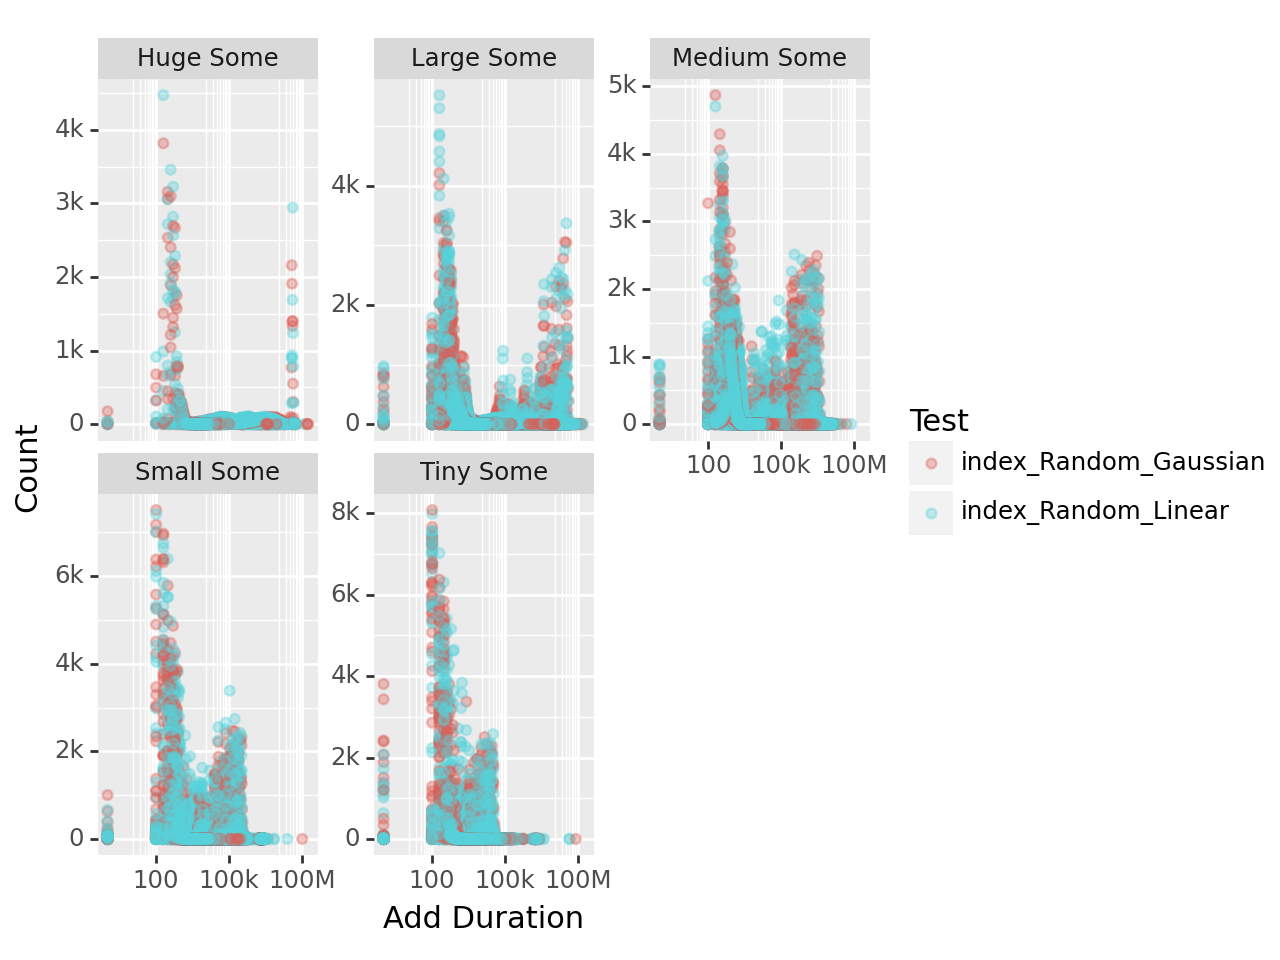

<Figure Size: (640 x 480)>

In [13]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import ggplot, scale_x_log10, geom_smooth, labs, scale_y_continuous, facet_wrap

(ggplot(plot_data, aes(x="Duration", y="Count", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + facet_wrap("Scenario", scales="free_y")
 + labs(x='Add Duration', y='Count')
 )

2k


C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


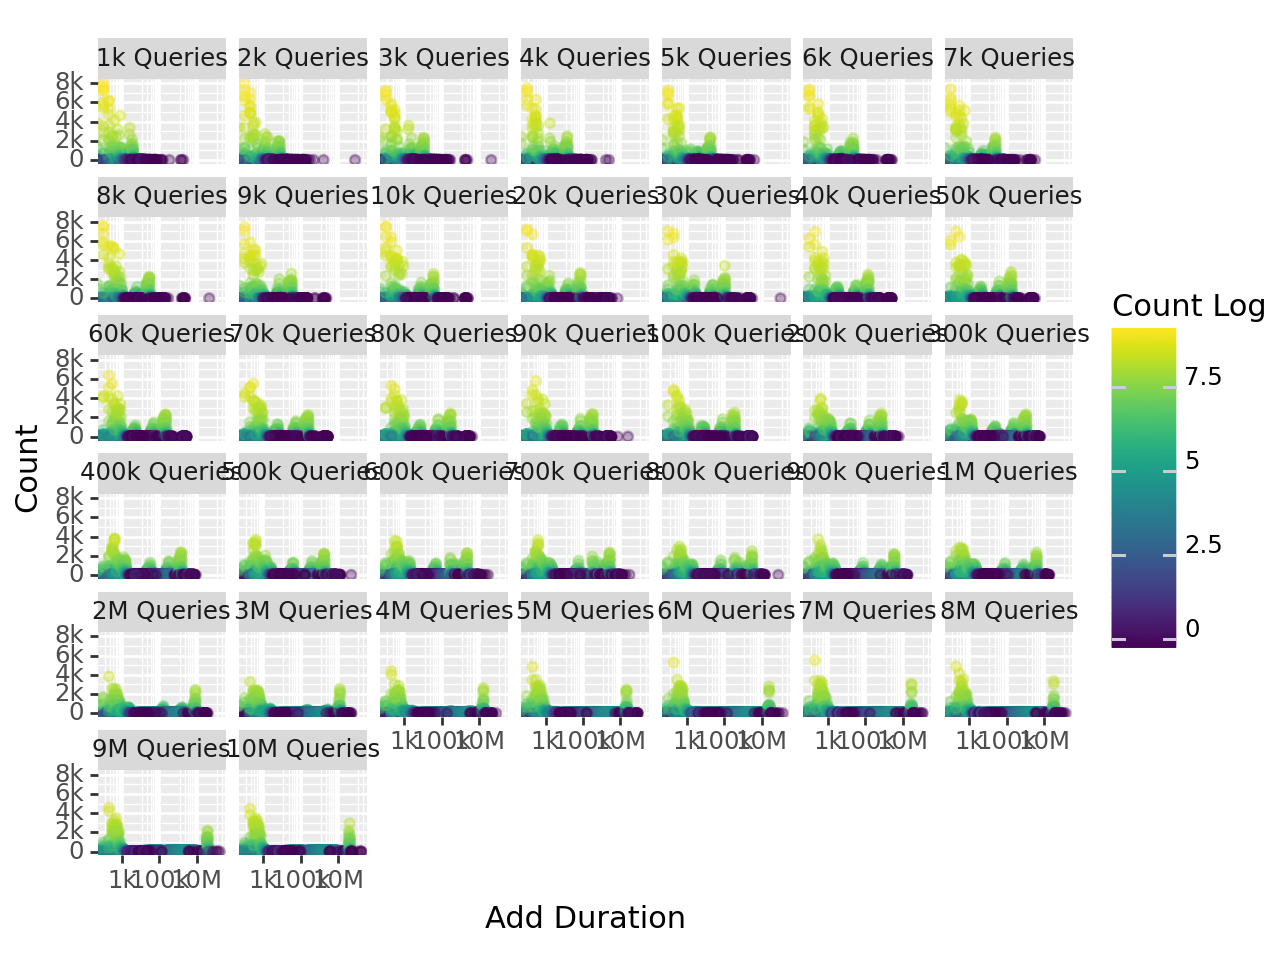

<Figure Size: (640 x 480)>

In [14]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, geom_smooth, labs, scale_y_continuous, \
    facet_grid

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


pretty_Format = number_suffix_format(fmt="{:.0f}")

print (pretty_Format([2134])[0])

def pretty_labeller(x):
    return pretty_Format([int(x)])[0] + " Queries"

(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Count Log"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 #+ facet_grid("Item Count ~ .", labeller=pretty_labeller)
 + facet_wrap("Item Count", labeller=pretty_labeller)
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


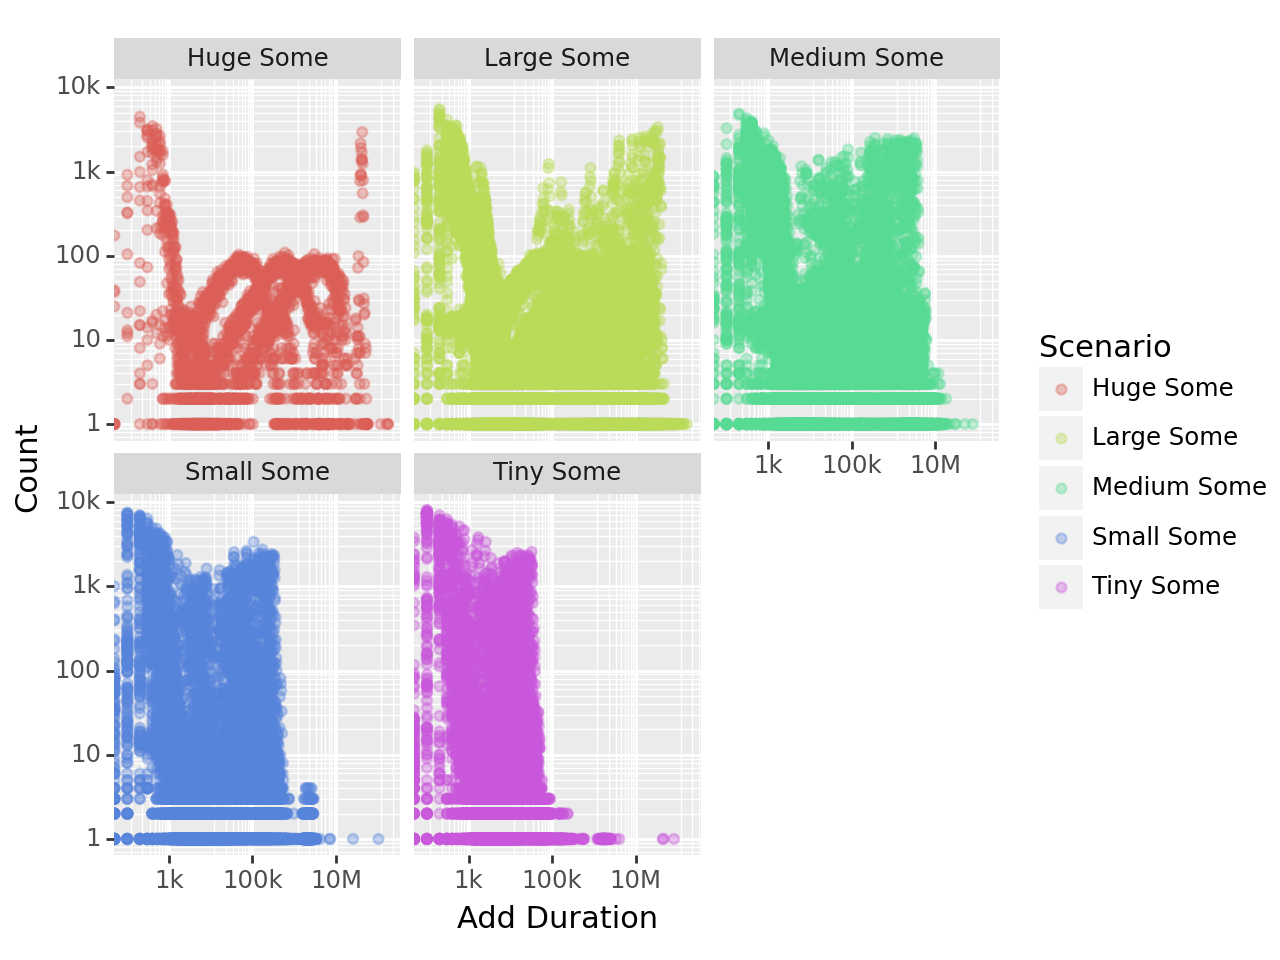

<Figure Size: (640 x 480)>

In [15]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_point, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Scenario"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 + facet_wrap("Scenario")
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


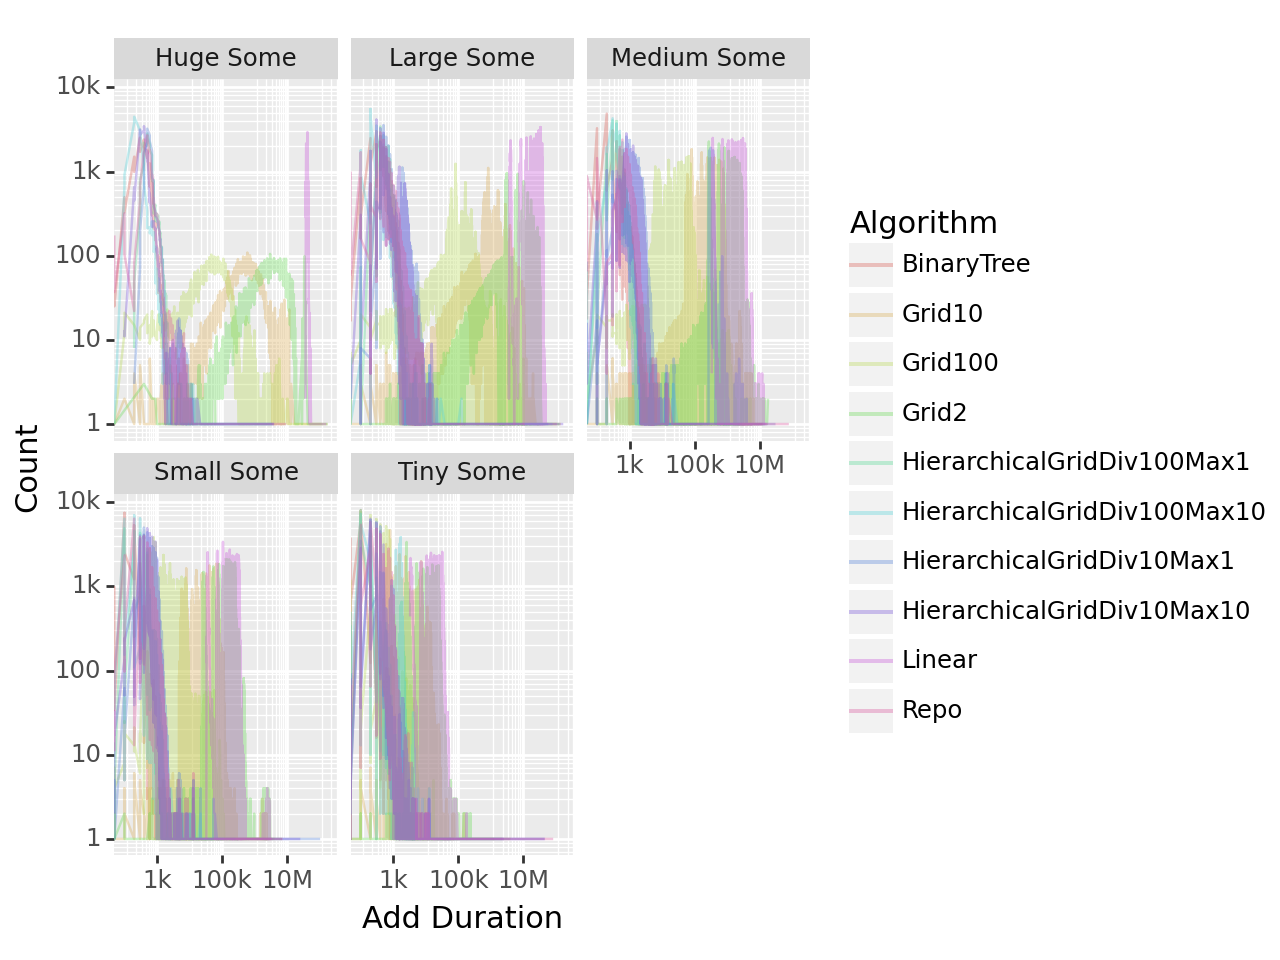

<Figure Size: (640 x 480)>

In [16]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_line, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Algorithm"))
 + geom_line(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 + facet_wrap("Scenario")
 )

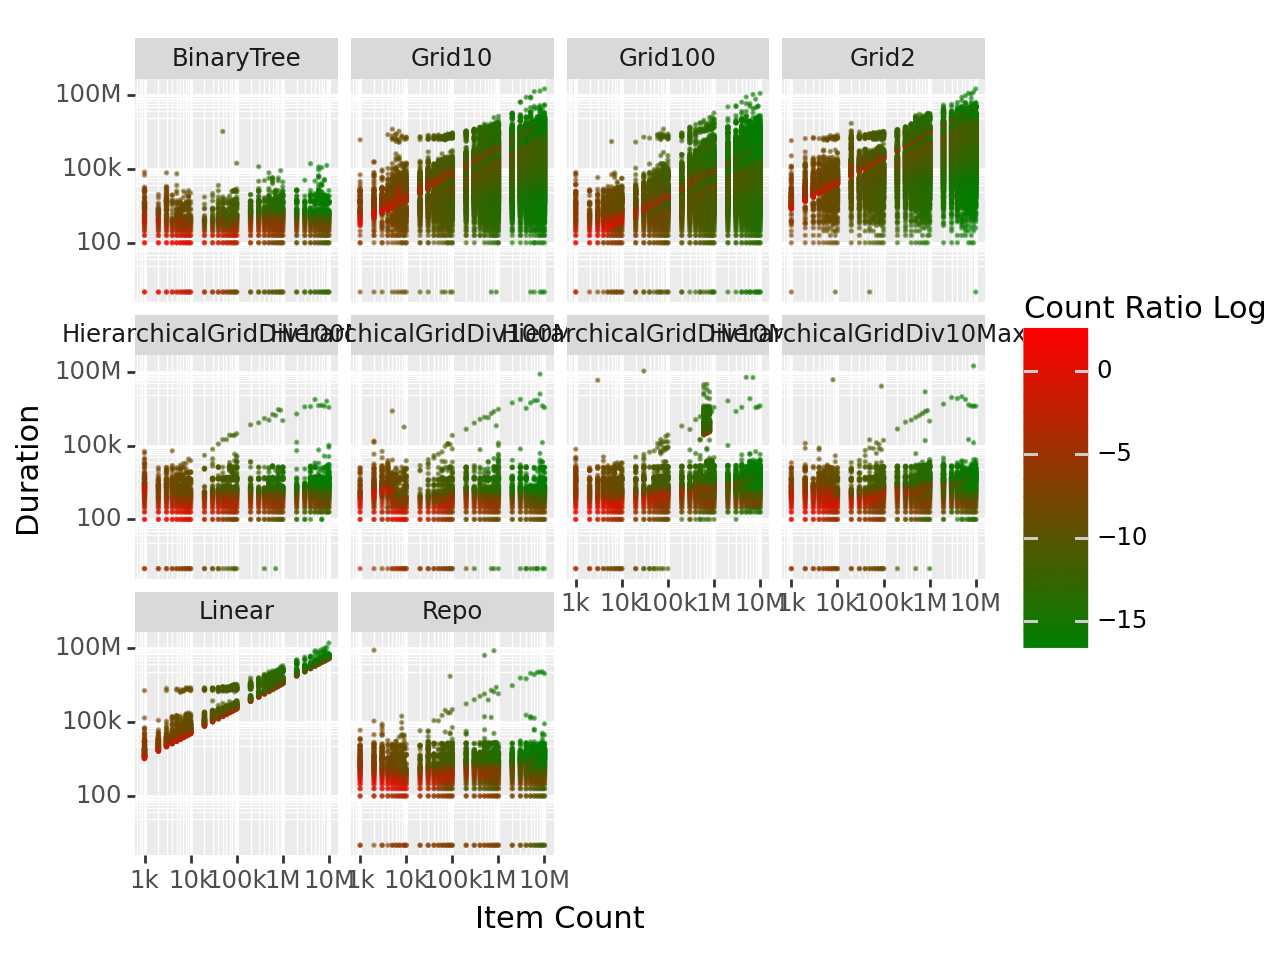

<Figure Size: (640 x 480)>

In [17]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

(ggplot(plot_data, aes('Item Count', 'Duration', color='Count Ratio Log'))
 + geom_point(size=0.1, alpha=0.5)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='green', high='red')
 + facet_wrap("Algorithm")
 )

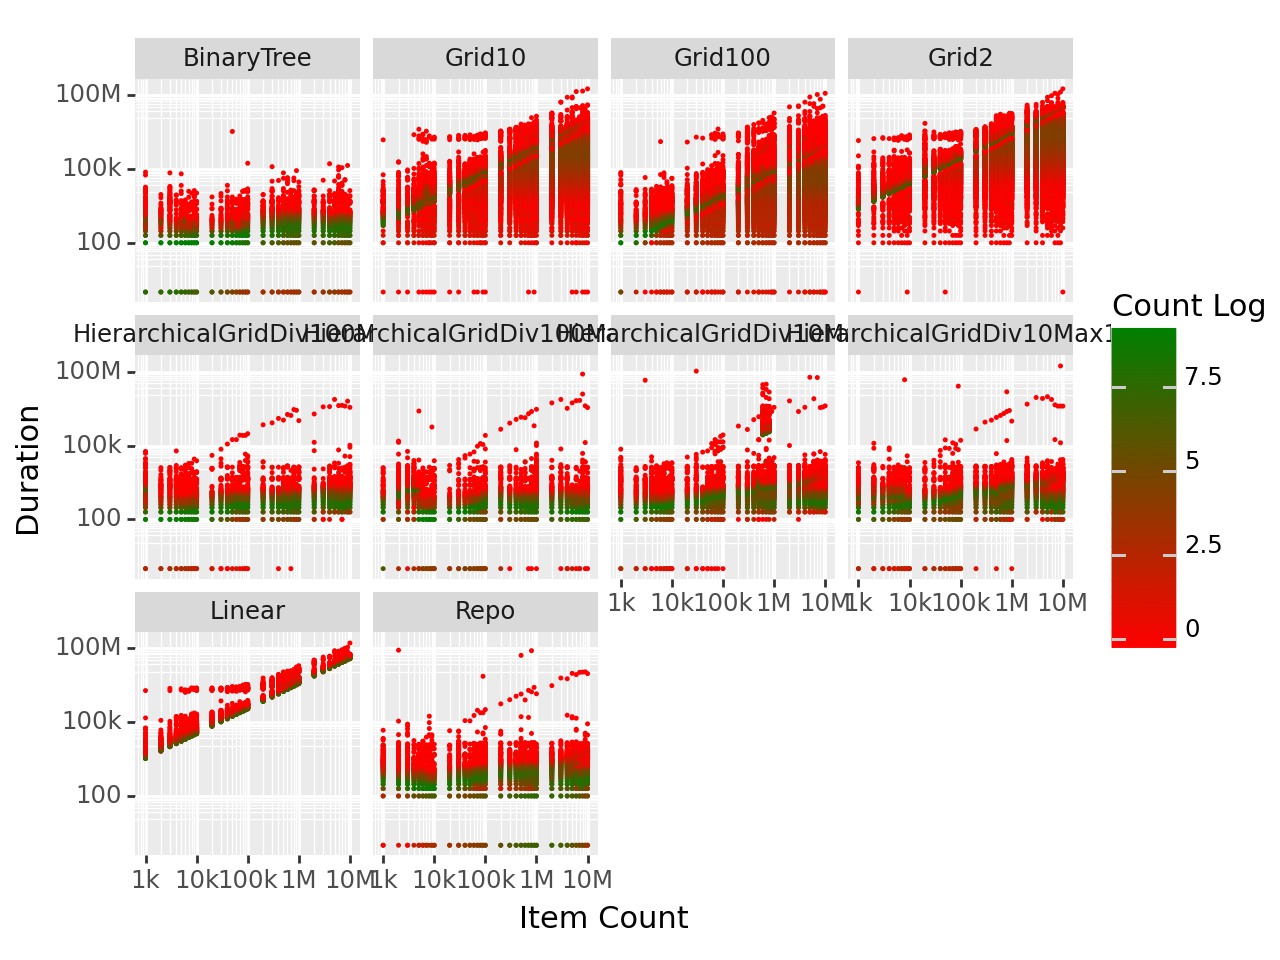

<Figure Size: (640 x 480)>

In [18]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

(ggplot(plot_data, aes('Item Count', 'Duration', color='Count Log', fill='Count Log'))
 + geom_point(size=0.01, alpha=1.0)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='red', high='green')
 + scale_fill_gradient(low='red', high='green')
 + facet_wrap("Algorithm")
 )


In [24]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

(ggplot(plot_data, aes('Item Count', 'Duration', color='Count Ratio Log', fill='Count Ratio Log'))
 + geom_point(size=0.01, alpha=1.0)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
  # + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
  # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='red', high='green')
 + scale_fill_gradient(low='red', high='green')
 + facet_wrap("Algorithm")
 )


TypeError: 'module' object is not callable

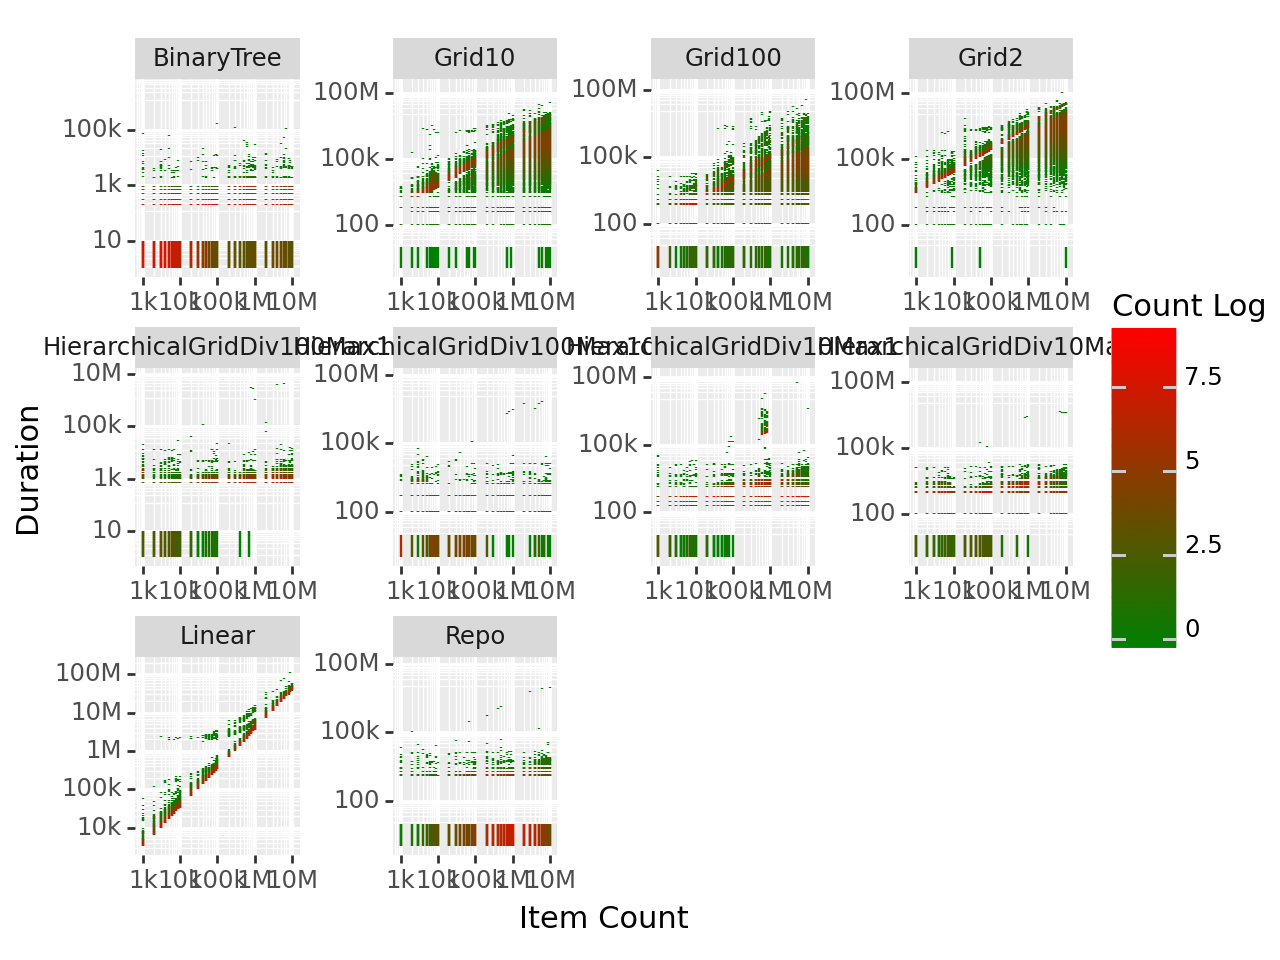

<Figure Size: (640 x 480)>

In [20]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

# https://ggplot2.tidyverse.org/reference/geom_tile.html
# geom_rect() and geom_tile() do the same thing, but are parameterised differently: geom_rect() uses the locations of the four corners (xmin, xmax, ymin and ymax), while geom_tile() uses the center of the tile and its size (x, y, width, height). geom_raster() is a high performance special case for when all the tiles are the same size. 
 
(ggplot(plot_data, aes("Item Count", "Duration"))
 + geom_rect(aes(xmin='Item Count', xmax='Item Count', ymin='Start Duration',ymax='End Duration', color='Count Log'))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
# + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
# + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='green', high='red')
 + facet_wrap("Algorithm", scales="free")
 )

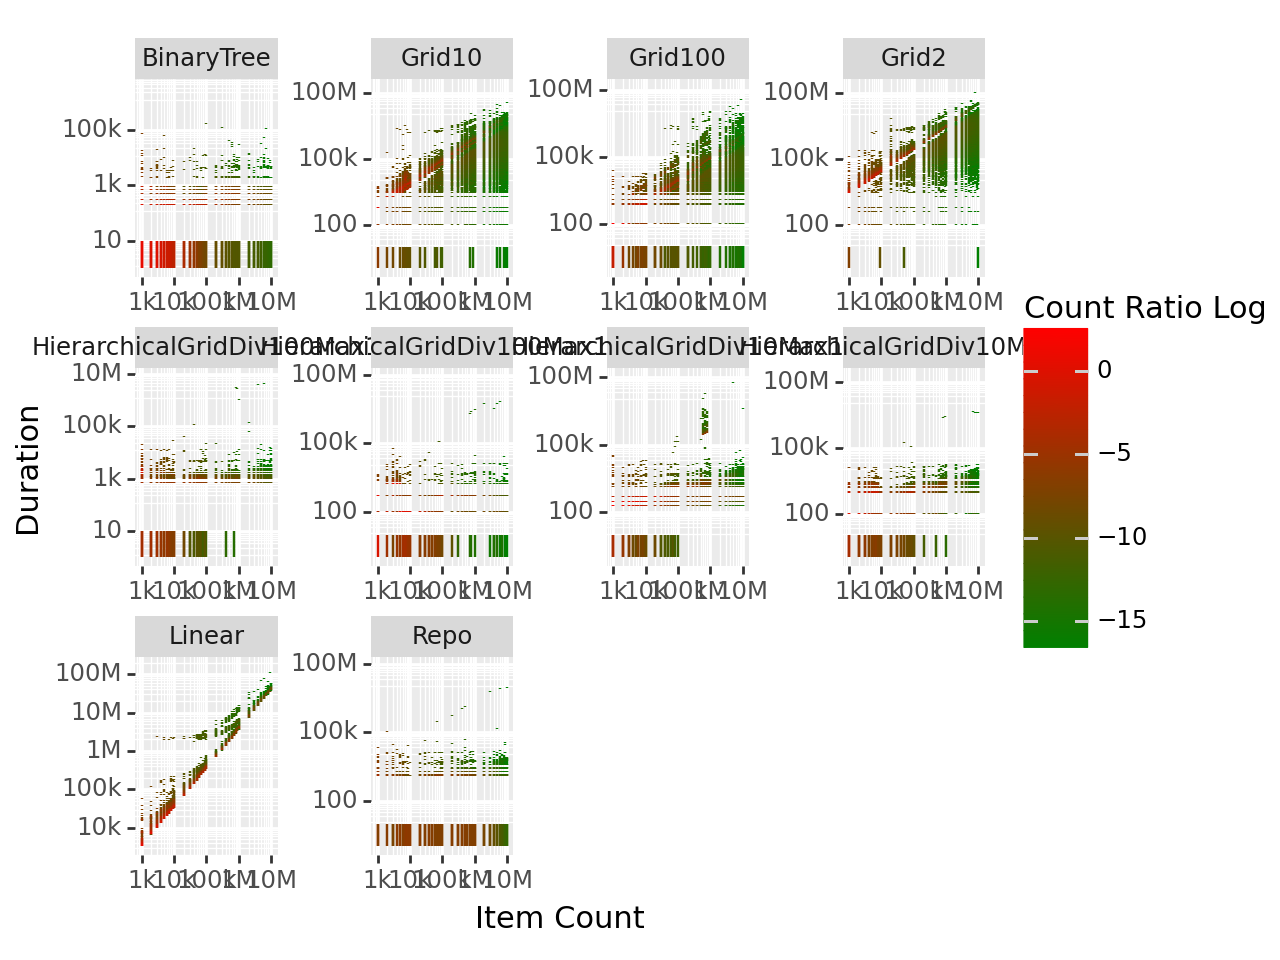

<Figure Size: (640 x 480)>

In [21]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

# https://ggplot2.tidyverse.org/reference/geom_tile.html
# geom_rect() and geom_tile() do the same thing, but are parameterised differently: geom_rect() uses the locations of the four corners (xmin, xmax, ymin and ymax), while geom_tile() uses the center of the tile and its size (x, y, width, height). geom_raster() is a high performance special case for when all the tiles are the same size. 

(ggplot(plot_data, aes("Item Count", "Duration"))
 + geom_rect(aes(xmin='Item Count', xmax='Item Count', ymin='Start Duration',ymax='End Duration', color='Count Ratio Log'))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='green', high='red')
 + facet_wrap("Algorithm", scales="free")
 )

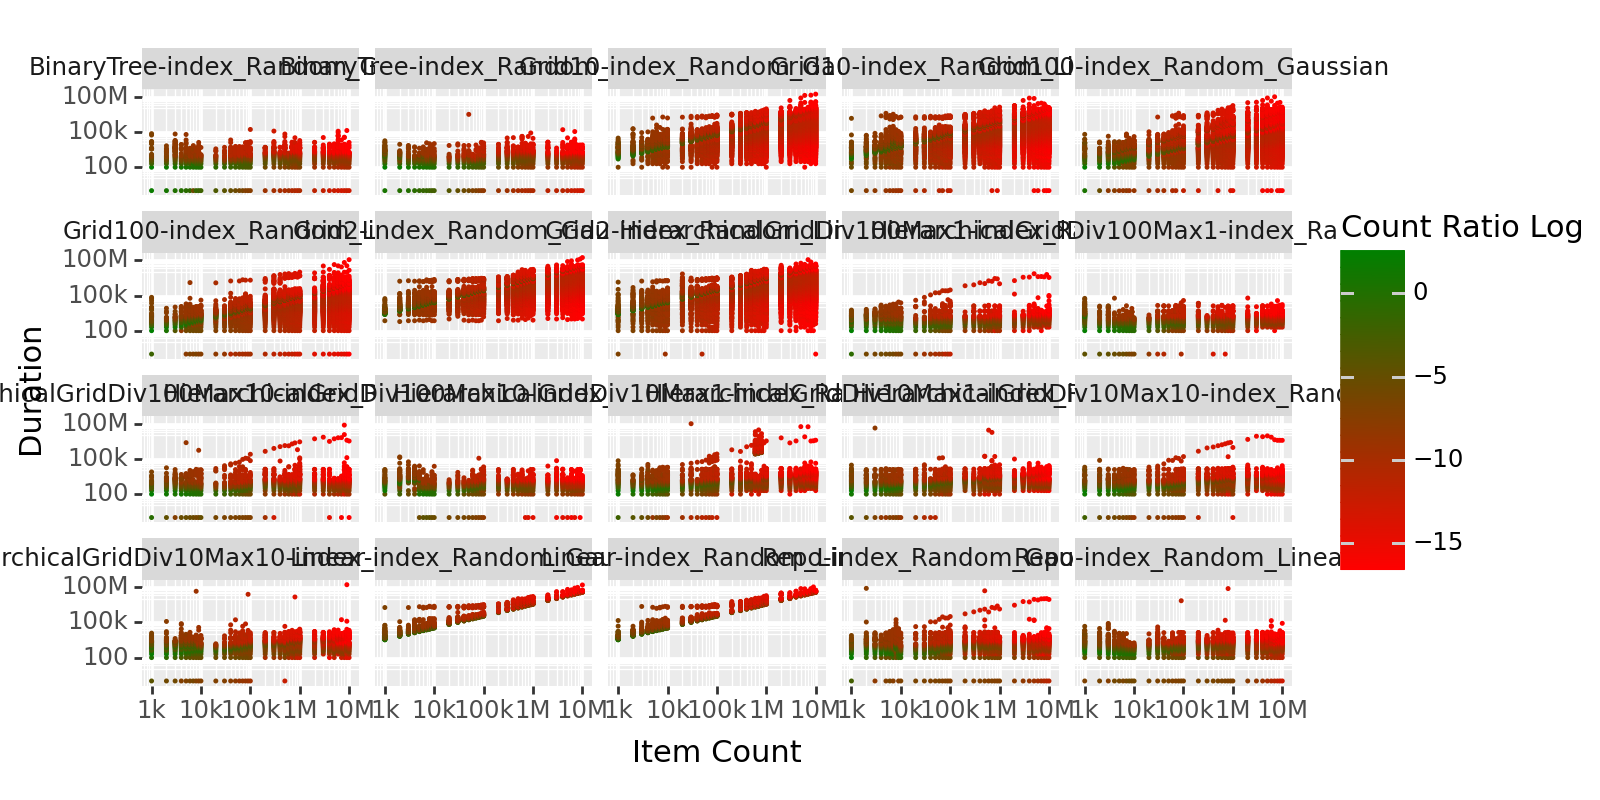

<Figure Size: (800 x 400)>

In [37]:
from plotnine import ggplot, aes, geom_tile, geom_point, geom_text, geom_raster, geom_rect, scale_x_log10, \
    scale_y_log10, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2, theme

plot = (ggplot(plot_data, aes('Item Count', 'Duration', color='Count Ratio Log', fill='Count Ratio Log'))
 + geom_point(size=0.01, alpha=1.0)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='red', high='green')
 + scale_fill_gradient(low='red', high='green')
 + facet_wrap("Algorithm-Test")
 + theme(figure_size=(8, 4))  # here you define the plot size
 )

# # Save the plot:
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis.pdf')
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis.png')
# plot.save(width=16, height=8, filename='performance-histogram-search-analysis.svg')

# Show the plot:
plot

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 16 x 8 in image.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: performance-histogram-search-analysis.pdf
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 16 x 8 in image.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: performance-histogram-search-analysis.png


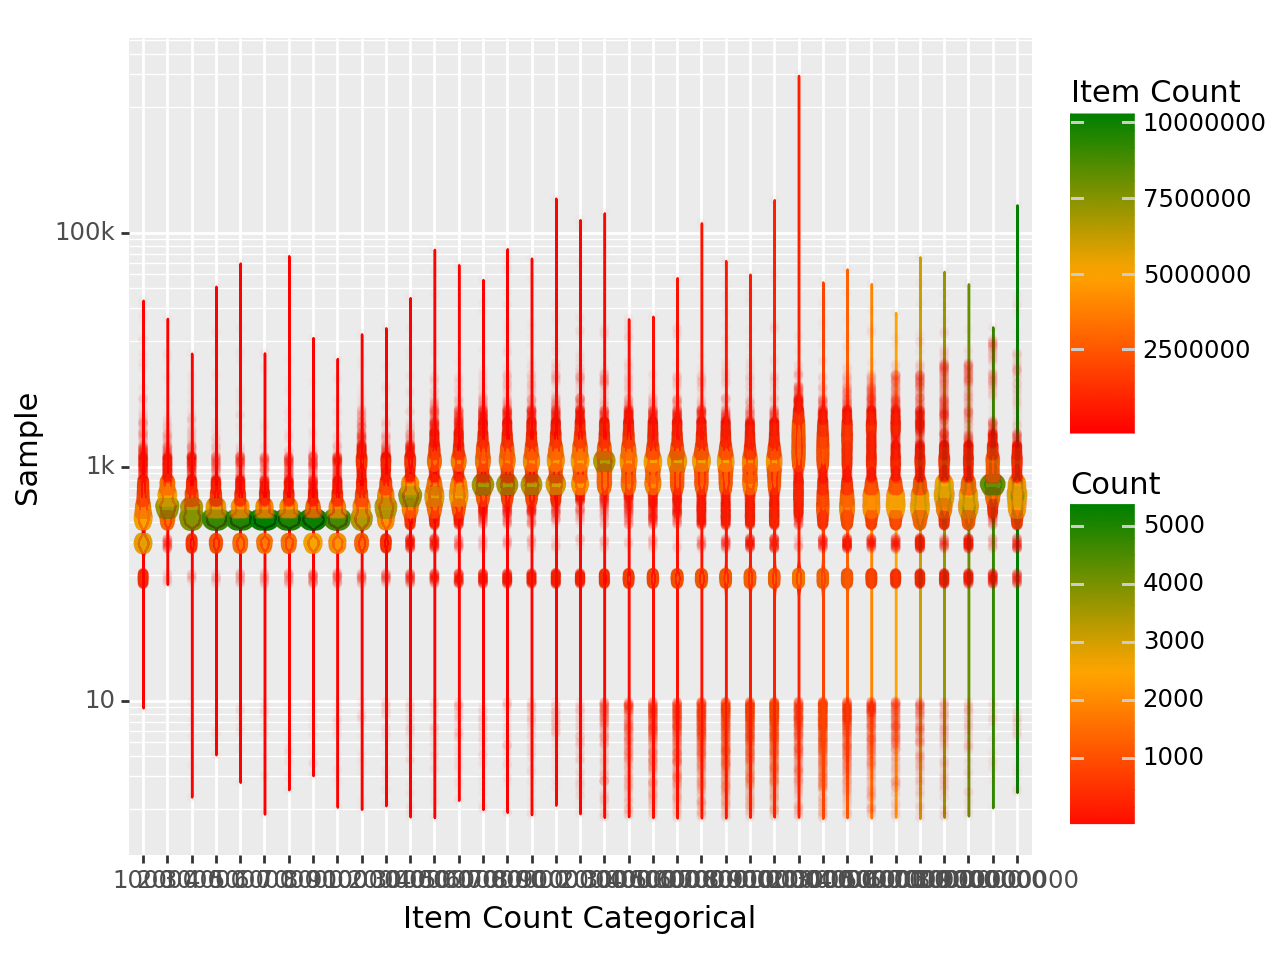

<Figure Size: (640 x 480)>

In [7]:
import numpy as np
from numpy.random import uniform
from numpy import repeat
from plotnine import ggplot, aes, geom_tile, geom_point, geom_text, geom_raster, geom_rect, scale_x_log10, \
    scale_y_log10, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2, theme, geom_violin, geom_sina, scale_fill_gradient2
from formatters.number_suffix_format import number_suffix_format

plot_data_repo = plot_data.copy()
plot_data_repo = plot_data_repo[plot_data_repo['Algorithm'] == 'Repo']
plot_data_repo = plot_data_repo[plot_data_repo['Test'] == 'index_Random_Linear']
#plot_data_repo = plot_data_repo[plot_data_repo['Item Count'] <= 3000]
# plot_data_repo = plot_data_repo[plot_data_repo['Item Count'] == 1000]
# plot_data_repo = plot_data_repo[plot_data_repo['Item Count'] == 10000000]

unique_item_counts = plot_data_repo['Item Count'].unique()

plot_data_repo['Item Count Categorical'] = pd.Categorical(plot_data_repo['Item Count'], categories = unique_item_counts)

# Expand the data points:
# plot_data_repo["Sample"] = repeat(plot_data_repo['Duration'], plot_data_repo['Count']).reset_index(drop=True)
# plot_data_repo["Sample"] = plot_data_repo.apply(lambda row: repeat(row['Duration'], row['Count']), axis=1)
plot_data_repo["Sample"] = plot_data_repo.apply(lambda row: uniform(row['Start Duration'], row['End Duration'], row['Count']), axis=1)
# Explode the column:
# https://stackoverflow.com/questions/39011511/pandas-expand-rows-from-list-data-available-in-column
plot_data_repo = plot_data_repo.explode('Sample', ignore_index=True)

# Set the data type for the sample column:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
plot_data_repo['Sample'] = pd.to_numeric(plot_data_repo['Sample'])


plot = (
        ggplot(plot_data_repo, aes('Item Count Categorical', 'Sample', color='Item Count', fill='Count'))
        #+ geom_point()
        + geom_violin()
        + geom_sina(alpha=0.02, size=2, stroke=0, show_legend=True)
        #+ geom_sina()
        #+ geom_tile(aes(width=.95, height=.95))
        #+ geom_text(aes(label='Count'), size=9)
        # + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
        + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
        #+ scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
        # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
        # + scale_color_gradient(low='red', high='green')
        # + scale_fill_gradient(low='red', high='green')
        + scale_color_gradient2(low='red', mid='orange', high='green', midpoint=5_000_000)
        + scale_fill_gradient2(low='red', mid='orange', high='green',midpoint=2500)
        #+ facet_wrap("Algorithm-Test")
        #+ theme(figure_size=(16, 8))  # here you define the plot size
        )

# # Save the plot:
plot.save(width=16, height=8, filename='performance-histogram-search-analysis.pdf')
plot.save(width=16, height=8, filename='performance-histogram-search-analysis.png')

plot

# plot_data_repo